# Data Generator


* `while` - `yeild`
* `next()`
* Image preprocess

**histogram equalization**

```python
cv2.equalizeHist(img)
```

**standardization**

```python
img_std = (img - img.mean()) / img.std()
```



In [1]:
from glob import glob
import cv2
import numpy as np
import imgaug.augmenters as iaa
import imgaug as ia
import matplotlib.pyplot as plt

# Read image path
IMG_SIZE = 256
# img_paths = glob('./seed/*/*.png')[:2]  # list
img_paths = glob('./seed/*/*.png')  # list
# img_paths

In [2]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Affine(
        rotate=(-45, 45),
        mode=ia.ALL, # edge, reflect, symmetric, warp, constant
        shear=(-16,16)
    )
])

In [3]:
# Data Generator
def data_generator(data_paths, batch_size):
    class_map = {'Charlock':0, 'Cleavers': 1, 'Fat Hen': 2, 'Maize': 3}
    '''data generator for fit_generator'''
    n = len(data_paths)
    i = 0
    data_paths = data_paths
    while True:
        image_data = []
        class_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(data_paths)
            path = data_paths[i]
            img = cv2.imread(path)[:,:,::-1]
            # img aug
            img = seq.augment_image(img)
            
            # img preprocess
            img_resize = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img_resize = img_resize/255
            # read label
            cls = path.split('/')[-2]

            image_data.append(img_resize)
            class_data.append(class_map[cls])
            i = (i+1) % n
        image_data = np.array(image_data)
        class_data = np.array(class_data)
        yield image_data, class_data


In [4]:
data_gen = data_generator(img_paths, batch_size=10)

# data_gen <class 'generator'>

[2 2 1 0 2 2 0 0 1 3]
<class 'numpy.ndarray'>
(10, 256, 256, 3) (10,)


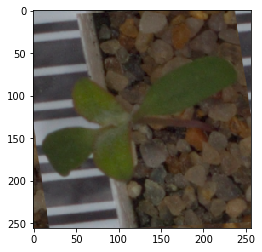

2


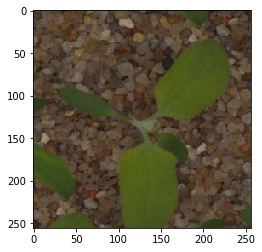

2


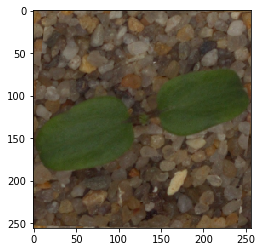

1


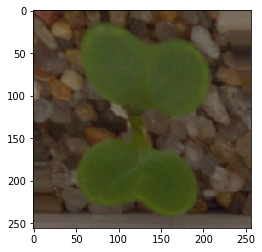

0


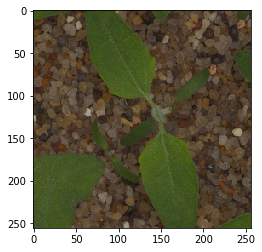

2


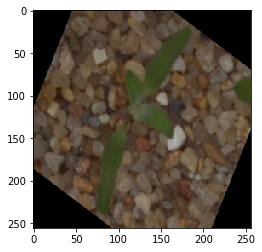

2


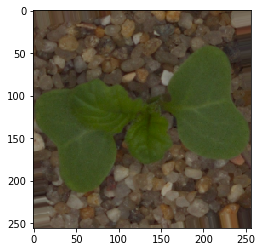

0


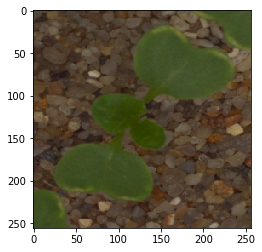

0


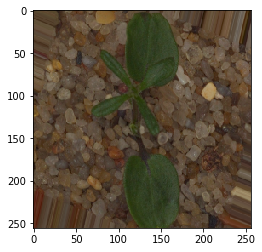

1


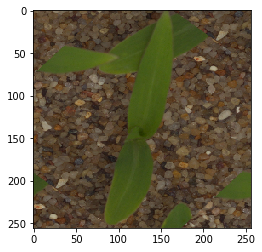

3


In [5]:
batch_img, batch_label = next(data_gen)
print(batch_label)
print(type(batch_label))

print(batch_img.shape, batch_label.shape)
for i in range(batch_img.shape[0]):
    plt.imshow(batch_img[i])
    plt.show()
    print(batch_label[i])

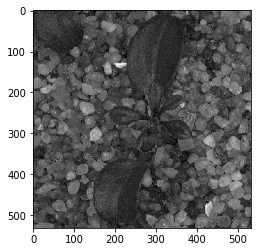

In [6]:
# Image preprocess
data_path = './seed/*/*.png' 
img_path = glob(data_path)[0]
img = cv2.imread(img_path)[:,:,0]
plt.imshow(img, cmap='gray')

In [7]:
img.shape

(531, 531)

**numpy.histogram**
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

```python
numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
```
* Parameters:	
    * a : array_like
    * bins : int or sequence of scalars or str, optional
    * range : (float, float), optional
    * normed : bool, optional
    * weights : array_like, optional
    * density : bool, optional
* Returns:
    * hist : array
    * bin_edges : array of dtype float

In [8]:
hist,bins = np.histogram(img.flatten(),256,[0,256])  # a, bins=256, range=[0,256]
print(hist)
print(bins)

[ 328   52   73   61   85   99  121  141  186  187  234  280  356  479
  532  644  832 1044 1265 1658 2162 2627 3291 3985 4592 5082 5356 5480
 5716 5517 5324 5375 5524 5487 5412 5444 5739 5658 5697 5718 5751 5698
 5607 5473 5527 5432 5249 5161 5103 5097 5009 4796 4665 4549 4322 4305
 4293 4082 3937 3953 3941 3914 3963 3725 3710 3665 3535 3499 3105 3120
 2860 2793 2636 2479 2263 2203 2061 1872 1748 1627 1500 1344 1258 1158
 1045  977  837  779  684  554  567  517  500  437  392  398  374  296
  322  312  287  271  235  214  205  164  153  139  138  115  108  110
   85   82   73   60   69   65   37   41   36   30   28   28   13   28
   16   21   19   18   19   13   10   11   24   11   10   13   10   12
    8   11   10   12   10   12    5    6    7    3    6    9    5    3
    1    3    1    2    2    0    0    1    1    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

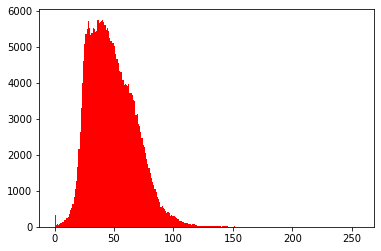

In [9]:
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.show()

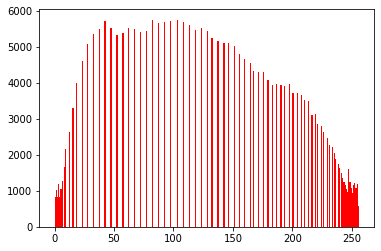

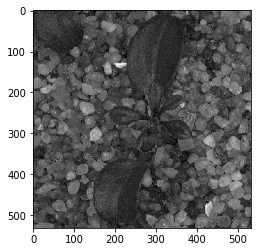

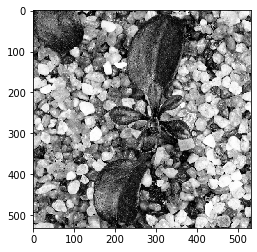

In [10]:
# histogram equalization
equ = cv2.equalizeHist(img)
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.show()
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(equ, cmap='gray')
plt.show()

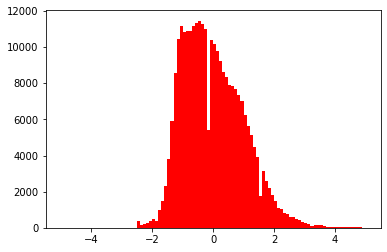

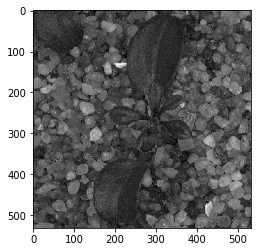

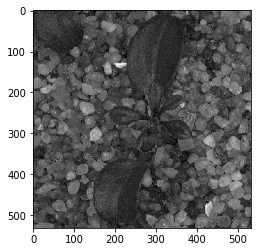

In [11]:
# standardization
img_std = (img - img.mean()) / img.std()
plt.hist(img_std.flatten(),100,[-5,5], color = 'r')
plt.show()
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img_std, cmap='gray')
plt.show()